<a href="https://colab.research.google.com/github/FatemehMomeni/AdvDM_pro3/blob/main/DM_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount google drive**

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Read test and train datasets**

In [2]:
import pandas as pd

train_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/01.train.csv")
test_dataset = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/02.test.csv")

In [3]:
# Set width and height to show datasets completely
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 670)

**Columns information**

In [4]:
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       668 non-null    float64
 1   Surface_Area               668 non-null    float64
 2   Wall_Area                  668 non-null    float64
 3   Roof_Area                  668 non-null    float64
 4   Overall_Height             668 non-null    float64
 5   Orientation                668 non-null    int64  
 6   Glazing_Area               668 non-null    float64
 7   Glazing_Area_Distribution  668 non-null    int64  
 8   Heating_Load               668 non-null    float64
 9   Cooling_Load               668 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 52.3 KB
None


**Check existence of missing values**

In [5]:
print('train dataset:\n\n',train_dataset.isnull().sum())
print('\ntest dataset:\n\n',test_dataset.isnull().sum())

train dataset:

 Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

test dataset:

 Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


**Check outliers by plotting box plots**

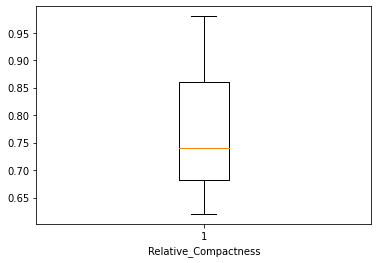

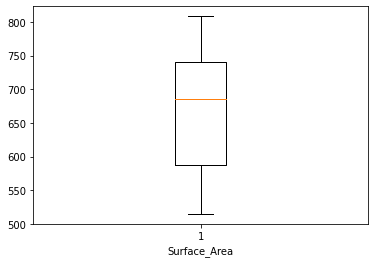

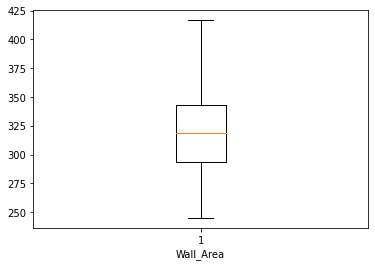

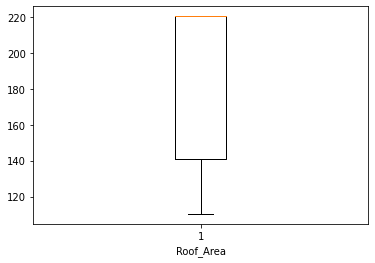

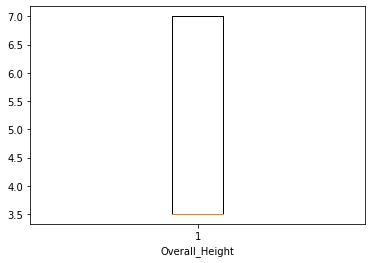

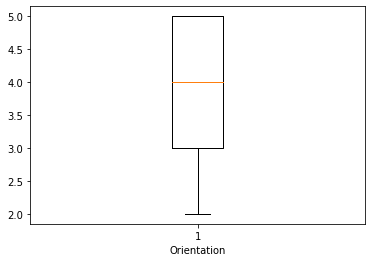

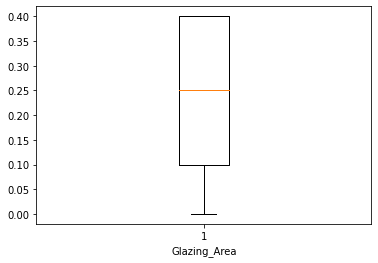

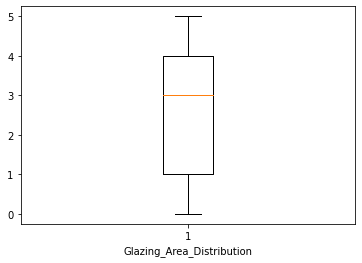

In [6]:
import matplotlib.pyplot as plt

for c in train_dataset.columns:
    if c not in ['Heating_Load', 'Cooling_Load']:        
        plt.xlabel(c)
        plt.boxplot(train_dataset[c])
        plt.show()

**Correlation matrix**

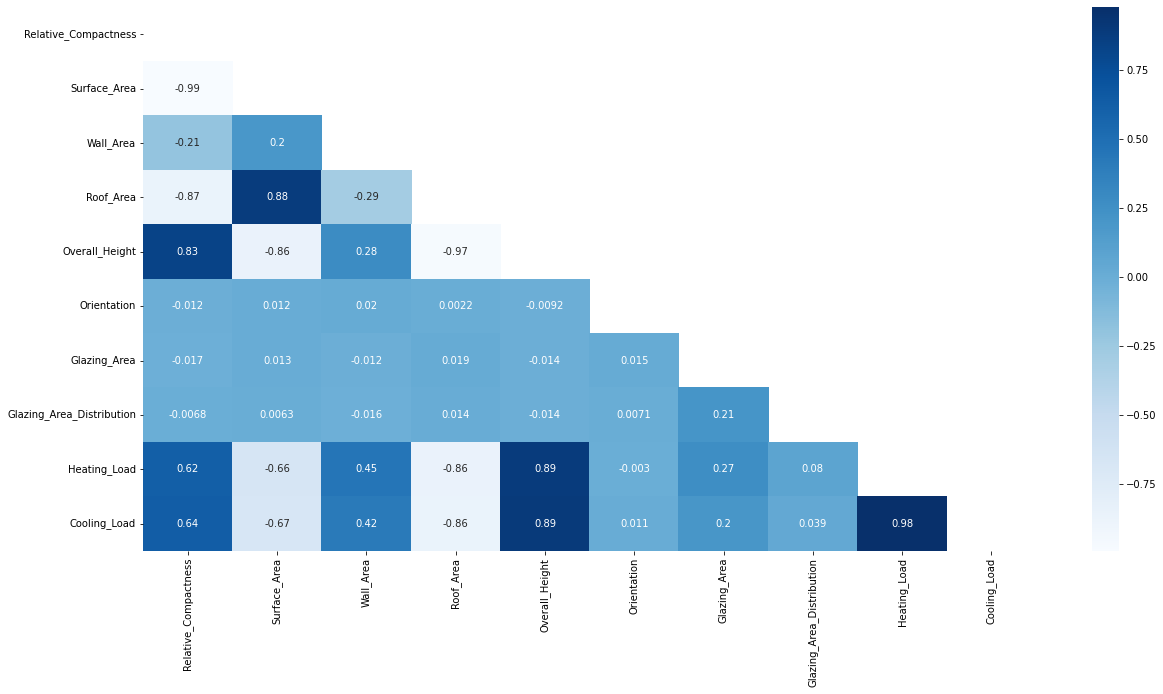

In [7]:
import numpy as np
import seaborn as sns

correlation = train_dataset.corr()
matrix = np.triu(correlation)  # Getting bottom triangle of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, mask=matrix, cmap='Blues')
plt.show()

**Delete columns**

In [8]:
reduced_train = train_dataset.drop(axis=1, columns=['Orientation', 'Surface_Area'])
reduced_test = test_dataset.drop(axis=1, columns=['Orientation', 'Surface_Area'])

print('train dataset:\n',reduced_train.columns,'\n\ntest dataset:\n',reduced_test.columns)

train dataset:
 Index(['Relative_Compactness', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'], dtype='object') 

test dataset:
 Index(['Relative_Compactness', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load'], dtype='object')


**Normalization**

In [9]:
processed_train = (reduced_train - reduced_train.min())/(reduced_train.max()-reduced_train.min())
processed_test = (reduced_test - reduced_test.min())/(reduced_test.max()-reduced_test.min())

print('train dataset:\n',processed_train.head(),'\n\ntest dataset:\n',processed_test.head())

train dataset:
    Relative_Compactness  Wall_Area  Roof_Area  Overall_Height  Glazing_Area  Glazing_Area_Distribution  Heating_Load  Cooling_Load
0              0.388889   1.000000   0.111111             1.0         1.000                        0.2      0.937449      0.771613
1              1.000000   0.285714   0.000000             1.0         0.625                        0.2      0.602858      0.495018
2              0.333333   0.000000   1.000000             0.0         0.250                        0.2      0.117282      0.068139
3              0.777778   0.428571   0.111111             1.0         0.250                        1.0      0.642222      0.509561
4              0.666667   0.285714   0.333333             1.0         0.625                        0.6      0.631437      0.470778 

test dataset:
    Relative_Compactness  Wall_Area  Roof_Area  Overall_Height  Glazing_Area  Glazing_Area_Distribution  Heating_Load  Cooling_Load
0              0.000000   0.714286   1.000000     

**Discretization**

In [10]:
equivalence_18 = (18-reduced_train['Heating_Load'].min())/(reduced_train['Heating_Load'].max()-reduced_train['Heating_Load'].min())
for c in processed_train.columns:
    if c == 'Heating_Load':
        processed_train[c] = pd.cut(processed_train[c], [0-0.01, equivalence_18, 1+0.01],labels=['Low_Load', 'High_Load'], right=False)
        processed_test[c] = pd.cut(processed_test[c], [0-0.01, equivalence_18, 1+0.01],labels=['Low_Load', 'High_Load'], right=False)
    elif c == 'Cooling_Load':
        processed_train[c] = pd.cut(processed_train[c], 5, labels=[1, 2, 3, 4, 5], right=False)
        processed_test[c] = pd.cut(processed_test[c], 5, labels=[1, 2, 3, 4, 5], right=False)
    else:
        processed_train[c] = pd.cut(processed_train[c], 4, labels=[1, 2, 3, 4], right=False)
        processed_test[c] = pd.cut(processed_test[c], 4, labels=[1, 2, 3, 4], right=False)

print('train dataset:\n',processed_train.head(),'\n\ntest dataset:\n',processed_test.head())

train dataset:
   Relative_Compactness Wall_Area Roof_Area Overall_Height Glazing_Area Glazing_Area_Distribution Heating_Load Cooling_Load
0                    2         4         1              4            4                         1    High_Load            4
1                    4         2         1              4            3                         1    High_Load            3
2                    2         1         4              1            2                         1     Low_Load            1
3                    4         2         1              4            2                         4    High_Load            3
4                    3         2         2              4            3                         3    High_Load            3 

test dataset:
   Relative_Compactness Wall_Area Roof_Area Overall_Height Glazing_Area Glazing_Area_Distribution Heating_Load Cooling_Load
0                    1         3         4              1            4                         3     Low_L

**Seperate class labels**

In [11]:
# train
y_train_heat = processed_train['Heating_Load']
y_train_cool = processed_train['Cooling_Load']
x_train = processed_train.drop(columns=['Heating_Load', 'Cooling_Load'])
# test
y_test_heat = processed_test['Heating_Load']
y_test_cool = processed_test['Cooling_Load']
x_test = processed_test.drop(columns=['Heating_Load', 'Cooling_Load'])

**Define a function for printing results**

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

def output_heat(model):
    model.fit(x_train, y_train_heat)    
    confusion = confusion_matrix(y_test_heat, model.predict(x_test))
    accuracy = accuracy_score(y_test_heat, model.predict(x_test))
    error_rate = 1 - accuracy
    specificity = confusion[1][1]/(confusion[1][0]+confusion[1][1])
    measures = precision_recall_fscore_support(y_test_heat, model.predict(x_test))
    
    print(confusion)
    print('Accuracy of classifier on test set: ', accuracy)
    print('Error rate of classifier on test set: ', error_rate) 
    print('Sensitivity of classifier on test set: ', measures[0][1])
    print('Specificity of classifier on test set: ', specificity)    
    print('Precision of classifier on test set: ', measures[0][0])
    print('Recall of classifier on test set: ', measures[0][1])
    print('F-score of classifier on test set: ', measures[1][0])
    print('\n')

In [13]:
from sklearn.metrics import f1_score

def output_cool(model):
    model.fit(x_train, y_train_cool)    
    measures = precision_recall_fscore_support(y_test_cool, model.predict(x_test))    
    
    print('Accuracy of classifier on test set: ', accuracy_score(y_test_cool, model.predict(x_test)))
    print('Precision of classifier on test set: ', measures[0][0])
    print('Recall of classifier on test set: ', measures[0][1])
    print('F-score of classifier on test set: ', f1_score(y_test_cool, model.predict(x_test), average='micro', zero_division=1))
    print('\n')

**Models**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Decision tree model
print("Decision tree:")
dt = DecisionTreeClassifier(random_state=0)
output_heat(dt)

# Random forest model
print("Random Forest:")
rf = RandomForestClassifier(n_estimators=10)
output_heat(rf)

Decision tree:
[[53  2]
 [ 1 44]]
Accuracy of classifier on test set:  0.97
Error rate of classifier on test set:  0.030000000000000027
Sensitivity of classifier on test set:  0.9565217391304348
Specificity of classifier on test set:  0.9777777777777777
Precision of classifier on test set:  0.9814814814814815
Recall of classifier on test set:  0.9565217391304348
F-score of classifier on test set:  0.9636363636363636


Random Forest:
[[54  1]
 [ 1 44]]
Accuracy of classifier on test set:  0.98
Error rate of classifier on test set:  0.020000000000000018
Sensitivity of classifier on test set:  0.9777777777777777
Specificity of classifier on test set:  0.9777777777777777
Precision of classifier on test set:  0.9818181818181818
Recall of classifier on test set:  0.9777777777777777
F-score of classifier on test set:  0.9818181818181818




In [26]:
from sklearn import svm
from sklearn.neural_network import MLPClassifier

# SVM
print("Support Vector Machine:")
s_v_m = svm.SVC(max_iter=300)
output_cool(s_v_m)

# Neural Network
print('Neural Network (multi-layer perceptron algorithm)')
mlp = MLPClassifier()
output_cool(mlp)

Support Vector Machine:
Accuracy of classifier on test set:  0.71
Precision of classifier on test set:  0.7872340425531915
Recall of classifier on test set:  1.0
F-score of classifier on test set:  0.7100000000000001


Neural Network (multi-layer perceptron algorithm)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of classifier on test set:  0.75
Precision of classifier on test set:  0.7872340425531915
Recall of classifier on test set:  1.0
F-score of classifier on test set:  0.75




/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converte